<a href="https://colab.research.google.com/github/Xixaus/Standard_add/blob/main/Standardni_pridavek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metoda standardního přídavku


- Program slouží k výpočtu koncentrace vzorku pomocí metody standardního přídavku nebo standardního přídavku za konstantního objemu a vytvoření příslušného grafu
- Nejdříve se připojte k hostujícímu prostředí v pravé horní části (je nutný se přihlásit ke Google účtu)
- Poté zadejte do první buňky hodnoty !podle návodu!, výpočet a graf vygenerujete spuštěním druhé buňky tlačítkem ▶ v levém horním rohu vedle napisu

- !!!Všechny objemy zadávejte ve stejných jednotkách, jednotlivá měření stejného roztoku oddělujte pomocí středníku (;), odezvy a objemy jednotlivých standardů pomocí lomítka (/) a jako desetinou značku používejte tečku (.)!!!


- V_unit zadejte jednotku objemu, ve které budete zadávat všechny objemy (bez indexů)
- R_unit zadejte jednotku měřené veličiny, která bude na y ose v grafu
- X_axys_name zvolte v čem chcete mít X osu
- V_flask zadejte objem odměrné baňky, v případě zadání 0 bude koncentrace vypočtena metodou přídavku standardu za zvýšení objemu
- V_sample zadejte objem odpiptovaného vzorku, ke kterému se přidávají standardy nebo který je opipetovává do odměrné baňky
- R_sample zadejte odezvy vzorku (např: 0.200; 0.204; 0.206)
- c_standard zadejte koncentraci standardu
- c_unit zadejte jednotku koncentrace standardu (bez indexů)
- V_standards zadejte objemy přidaných standardů (např: 2.0 / 4.0 / 6.0 / 8.0 / 10.0)
- R_standard zadejte odezvy odezvy standardů (např: 0.365; 0.360; 0.375 / 0.514; 0.51; 0.518)
- Pomocí volby Save_graph můžete graf uložit ve formátu .pdf, který se nachází ve složce soubory v levé části obrazovky pod ikonou 📁 s názvem graph.pdf. Dvojklikem soubor stáhnete




In [16]:
#@title Vstupní hodnoty { run: "auto", vertical-output: true }
V_unit = 'ml' #@param {type:"string"}
R_unit = "Odezva" #@param {type:"string"}
X_axys_name = "Zvysena koncentrace" #@param ["Zvysena koncentrace", "Pridany objem standardu"]
V_flask = 50#@param {type:"number"}
V_sample =  10#@param {type:"number"}
R_sample = "2.90" #@param {type:"string"}
c_standard =  150#@param {type:"number"}
c_unit = '\u03BCg/ml' #@param {type:"string"}
V_standards = "5/10/15/20"#@param {type:"string"}
R_standards = "4.29/6.19/7.40/9.08"#@param {type:"string"}
Save_graph = False #@param {type:"boolean"}

y = 0.1031x + 2.8780
R²: 0.9966
Koncentrace vzorku: 1.395e+02 μg/ml
Směrodatná odchylka: 1.0e+01 μg/ml
Interval spolehlivosti: 2.4e+01 μg/ml


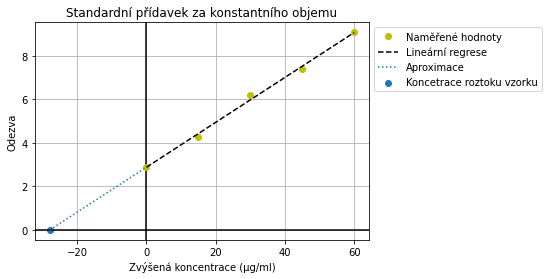

In [17]:
#@title Graf s výsledkem
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt #import knihoven

R_st2, V_st2, R_st3, x, X, y = [], [], [], [], [], [] #vytvoření prázdných listů

R_st1 = R_standards.split("/")
V_st1 = V_standards.split("/")
R_sa1 = R_sample.split(";") #separace vstupních stringů na seznamy podle dělécího znaménka

for i in range(len(R_sa1)): #vložení 0 nulových hodnot podle počtu R_sample do seznamu objemů
  V_st2.append(0)

for i in range(len(R_st1)): #rozseparování stringů odezev na seznamy
  R_st2.append(R_st1[i].split(";"))

for i in range(len(R_st2)): #znásobení objemů standardů podle počtu odezev a přidání k 0 hodnotám
  for ii in range(len(R_st2[i])):
    V_st2.append(V_st1[i])

for i in range(len(R_st2)): #převedení vnořených seznamů do jednoho seznamu
  R_st3 += R_st2[i]

X = [float(i) for i in (V_st2)] #převedení objemů na float
y = [float(i) for i in (R_sa1 + R_st3)] # spojení odezev vzorku a standardů a převedení na float

if V_flask is 0: #Volba konstatního objemu nebo přídavku
  graph_name = "Standardní přídavek"
  if X_axys_name == "Zvysena koncentrace": #zjištění volby zobrazení
    x = [(X[i]*c_standard)/(V_sample + X[i]) for i in range(len(X))]
    x_name = "Zvýšená koncentrace" + " (" + c_unit + ")" #vytvoření legendy
  else:
    x = X
    x_name = "Přidaný objem standardu" + " (" + V_unit + ")"

else:
  graph_name = "Standardní přídavek za konstantního objemu"
  if X_axys_name == "Zvysena koncentrace": #zjištění volby zobrazení
    x = [X[i]*(c_standard/V_flask) for i in range(len(X))] #přepočtení objemů standardu na koncentraci v odměrné baňce
    x_name = "Zvýšená koncentrace" + " (" + c_unit + ")" #vytvoření legendy
  else:
    x = X
    x_name = "Přidaný objem standardu" + " (" + V_unit + ")"

coef = np.polyfit(x,y,1) #lineární regrese
poly1d_fn = np.poly1d(coef) #převedení na rovnici regrese
R2 = (np.corrcoef(x, y)[0,1])**2 #výpočet korelačního koeficientu

if R2 == 1: # v případě dokonalé korelace, zastavení výpočtu odchylky
  Sx = 0
else:
  x_ave = sum(x)/len(x)
  y_ave = sum(y)/len(y) #výpočet průměrů

  S_rezid = 0
  for i in range(len(x)):
    S_rezid += (y[i]-coef[0]*x[i]-coef[1])**2 #Součet druhých mocnin reziduí

  sx = 0
  for i in range(len(x)): 
    sx += (x[i]-x_ave)**2 #čitatel kovarience xx

  Sy = math.sqrt(S_rezid/(len(x)-2)) #Směrodatná odchylka regrese

  Sx = (Sy/abs(coef[0]))*math.sqrt((1/len(x))+(y_ave**2/((coef[0]**2)*sx))) #směrodatná odchylka výsledku

sample = coef[1]/coef[0] #vypočtení množství standardu/koncentrace vzorku

if V_flask is 0: #výpočet koncetrace v případě volby metody standardního přídavku
  if X_axys_name == "Zvysena koncentrace":
    final_sample = sample #výpočet koncentrace vzorku
    final_sample_st_dev = Sx
    sample_name = "Zvýšená koncentrace roztoku vzorku"
  else:
    final_sample = sample * c_standard / V_sample #přepočtení objemu standardu na koncentraci
    final_sample_st_dev = Sx * c_standard / V_sample
    sample_name = "Objem standardu ve vzorku"

else: #výpočet koncetrace v případě volby metody standardního přídavku za konstantního objemu
  if X_axys_name == "Zvysena koncentrace":
    final_sample = sample * V_flask / V_sample #výpočet koncentrace vzorku
    final_sample_st_dev = Sx * V_flask / V_sample
    sample_name = "Koncetrace roztoku vzorku"
  else:
    final_sample = sample * c_standard / V_sample #přepočtení objemu standardu na koncentraci
    final_sample_st_dev = Sx * c_standard / V_sample
    sample_name = "Objem standardu ve vzorku"

if R2 != 1:
  final_sample_con_int = final_sample_st_dev * scipy.stats.t.ppf(q=0.95,df=(len(x)-2)) #výpočet intervalu spolehlivosti 0,05

x.insert(0, -sample) #přidání koncentrace/objemu standardu ve vzorku
y.insert(0, 0) #přidaní nulové hodnoty na začátek seznamu

plt.grid() #nastavení parametrů grafu
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel(x_name)
plt.ylabel(R_unit)
plt.title(graph_name)

plt.plot(x[1:], y[1:],"yo", label="Naměřené hodnoty") #vložení a nastavení hodnot v grafu
plt.scatter(x[0], y[0], marker="o", label= sample_name)
plt.plot(x[1:], poly1d_fn(x[1:]), '--k',label="Lineární regrese")
plt.plot(x[:2], poly1d_fn(x[:2]), ls = ':', label="Aproximace")
plt.legend(bbox_to_anchor=(1, 1))

print (f"y = {coef[0]:.4f}x + {coef[1]:.4f}")
print (f"R\u00B2: {R2:.4f}")
print (f"Koncentrace vzorku: {final_sample:.3e} {c_unit}")
if R2 != 1: # v případě dokonalé korelace, nevypsání odchylky a intervalu spolehlivosti
  print (f"Směrodatná odchylka: {final_sample_st_dev:.1e} {c_unit}")
  print (f"Interval spolehlivosti: {final_sample_con_int:.1e} {c_unit}")

if Save_graph is False:
  plt.show()
else:
  plt.savefig("graph.pdf", bbox_inches="tight")